# Classification with the Perceptron Neural Network using Intel® Python

In this section, we will build the Perceptron Algorithm in Intel® Python. The principal idea is to train a single-layer neural network model to correctly data classify.

## Objectives

* **Understand** the concept of Single-layer Neural Network in the Perceptron;
* **Learn** about the Perceptron Neural Network Algorithm;
* **Create** a simple Perceptron Neural Network to data classification;
* **Train** the Perceptron Neural Network Model;
* **Observe** the performance of the trained Perceptron Neural Network Model.

## The Problem: Classification Data

<p style='text-align: justify;'> 
Classification problems require the given data set to be classified into two or more categories. A simple example is buying something from the online portal now or waiting a couple of months to get the maximum discount. Or, if you are planning to buy a car, which car out of available options is the best buy given your budget? Classification problems can be of the following different types, for example:
</p>  

- Classifies data into two classes: yes/no, good/bad, and high/low.

- Classifies data into three or more categories. 

## The Solution: Perceptron Neural Network

<p style='text-align: justify;'> 
Perceptron Neural Network is an algorithm that imitates how a neuron in the brain works. It is also called a single-layer neural network consisting of a single neuron. The output of this neural network is decided based on the outcome of just one activation function associated with the single neuron. In perceptron, the forward propagation of information happens. A deep neural network consists of one or more perceptrons in two or more layers. Input to different perceptrons in a particular layer will be fed from the previous layer by combining them with different weights. 
</p>     

<p style='text-align: justify;'> 
Before studying a perceptron neural network, we must understand how a human neuron works. The <b>dendrites</b> are the entrances to the neuron. They receive electrical signals from other neurons and send them to the cell body.
</p> 

<p style='text-align: justify;'> 
Inside the <b>cell body</b>, information processing is carried out through the <b>sum</b> of the inputs that the neuron receives. This set of added electrical stimuli causes the cell nucleus of the neuron to send the result of the sum of the information it received to a structure called <b>axon</b>, which consequently sends these electrical signals to the <b>axon terminals</b>, thus producing an output stimulus.
</p> 
       
     
     
<p style="text-align: center;">
 <img src="images/figure1_humanNeuron.png"  width="500" height="500">
</p>

<p style='text-align: justify;'>
In an artificial neural network the logic is quite similar. First, the network receives different signals at its inputs, which are represented by ($X_1$, $X_2$, $X_n$ ...). 
</p>

<p style='text-align: justify;'>
From there, the input signals pass through weights ($W_1$, $W_2$, $W_n$ ...) which are nothing more than multipliers that control the influence of each of the inputs of the neural network. Initially, these weights are randomly generated. However, as we will see in the following modules, the weights are adjusted according to the training of the network. After the neural network multiplies the inputs $X_n$ by the weights $W_n$, a sum of all results is performed according to the following formula:
</p>
    
$$y = \sum_{i = 0}^{n} (W_i*X_i)$$
<br>
<br>
    
Once the sum is performed, the result is then sent to a function called sigmoid, which has the function of activating or not activating the network output: 
</p>

<br>

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

<br>
<br>

<p style='text-align: justify;'>
    The following is a complete representation of the structure of a perceptron neural network:
</p>

<p style="text-align: center;">
 <img src="images/figure2_perceptron.jpg"  width="500" height="500">
</p>

## Implementing the Perceptron Neural Network with Intel® Python

Now that we have studied the Perceptron Algorithm, let us implement the actual algorithm using with Intel® Python. Create a code that will store our Perceptron implementation for a generical problem:

#### ⊗ Import Python Packages 
The first thing we need to do is import the necessary libraries to be able to implement our perceptron neural network.

In [1]:
# Python Packages
import numpy as np
import matplotlib.pyplot as plt
import random
import math

#### ⊗ Define the inputs

<p style='text-align: justify;'>
In this first example, we will define two inputs ($X_1$, $X_2$) with fixed values to simplify the didactics of how a neural network is built. However, in real applications, the importance ​​of inputs is composed of a set of diverse data.
<p/>

In [2]:
# Inputs
X = [1, 0]

#### ⊗ Generate weights

<p style='text-align: justify;'>
Here we will generate the weights to compose our neural network. We will initially generate random weights in this example, but it is important to note that these weights will be updated when the network is trained. The weight training itself will be covered in a later module.
</p>

<p style='text-align: justify;'>
This code snippet generates two weights ($W_1$, $W_2$), and then a loop uses the random function to generate random values between $-1$ and $1$.
</p>

In [3]:
# Creating the perceptron weights
W = []
nInputs = 2

for i in range(nInputs):
    W.append(random.uniform(-1, 1))
print("Weights:")
print(W)

Weights:
[0.0074016012542610365, -0.9379547665313435]


#### ⊗ Calculate the sum of the network

<p style='text-align: justify;'>
In this step, the algorithm will multiply the inputs by the weights, adding the result of this multiplication, thus resulting in an output value of the network.
</p>

$$
y = (X_1 * W_1) + (X_2 * W_2)
$$

In [4]:
# Calculating sum of the network
y_sum = 0
for i in range(len(W)):
    y_sum =  y_sum + (W[i] * X[i])  
print(y_sum)

0.0074016012542610365


#### ⊗ Activation Function (*Sigmoid*)

<p style='text-align: justify;'>
Limiting the outputs allows the network to produce results at an adequate scale for most problems. The sigmoid function is used in neural networks because it defines the outputs between $0$ and $1$, which is helpful for classification problems. It is also differentiable, which is essential for training the network. At the same time, function differentiability is necessary to adjust network weights during training.
</p>

In [5]:
# Activation function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

<p style='text-align: justify;'>
Plotting a graph is one way to understand how the sigmoid function works. We can see that the sigmoid function is not linear and that it varies from $0$ to its maximum value of $1$. 
</p>    
    
<p style='text-align: justify;'>  
This characteristic is used to decide if the neural network's output will be activated. If the output value is close to $0$, the network output will not be started. However, if the output approaches $1$, it will be activated.
</p>

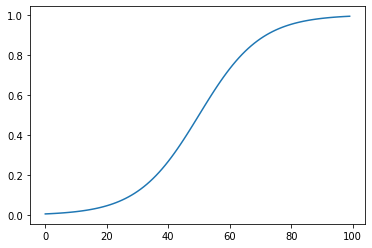

In [6]:
plt.plot([sigmoid(x) for x in np.arange(-5,5,0.1)])
plt.show()

#### ⊗ Output from the network

<p style='text-align: justify;'>
At this point we create a function called activated where the value generated through the result of the sum of the network values ​​passing through the sigmoid function will be stored, thus generating a final activation value.
</p>

In [7]:
# Use the sigmoid function
activated = sigmoid(y_sum)
print(activated)

0.5018503918659634


<p style='text-align: justify;'>
The activated function will show the network output value, which must be within a range between 0 and 1. The closer to 1, the more likely it is that the input data and weights converged to a desired result.
</p>

##### Discussion: What happened?

- ``Why is it advisable to initialize the weights randomly?``
     
- ``What is the meaning of the value of the sum of the weights and inputs submitted to the activation function?``

## ☆ Challenger: Classification of Roses and Violets  ☆

Consider the following problem:

**Roses are red, violets are blue, the stems of roses are tall, and violets are short.**

Then:

- Having the color spectrum between $red = 0$ and $blue = 10$.

- Between $0$ and $10$, there is a mixture of the two colors, where the closer to $0$ is redder, and the closer to $10$ is bluer.

- Given a set of pairs with (height and color) determine whether it is a rose or a violet.

<p style="text-align: center;">
 <img src="images/figure3_rosesXviolets.png"  width="500" height="500">
</p>


1. Create a Perceptron Neural Network with Python.

2. Formulate the labels (known data) for this problem.

3. Use the Perceptron to classify whether they are pink or violet, and answer:
    
    - ``How many did she get right and wrong?``
    
    - ``What is the problem?``

### ☆ Solution ☆ 

In [8]:
# Import Python Packages
import numpy as np
import math
import random
from matplotlib import pyplot as plt

In [9]:
# Activation function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [10]:
# Defines an array X_inputs where the first value refers to the flower color and the second refers to the stem size
# X_inputs = ([[color, stem], [color, stem] ...])
X_inputs = np.array([
             [ 1, 10 ],  # Rose
             [ 2, 25 ],  # Rose
             [ 3, 22 ],  # Rose
             [ 4, 20 ],  # Rose
             [ 5, 23 ],  # Rose
             [ 6, 1 ],   # Violet
             [ 7, 8 ],   # Violet
             [ 8, 1 ],   # Violet
             [ 9, 10 ],  # Violet
             [ 10, 8 ],  # Violet                                
])

In [11]:
# Creating random perceptron weights
# Attention!! In this exercise, the weights will be randomly generated because the objective 
# is to understand how the neural network works. However, in the next modules, we will study 
# how we can update the weights from neural network training.
w = []
w_inputs = 2

for i in range(w_inputs):
    w.append(random.uniform(-1, 1))
print("Weights:")
print(w)

Weights:
[-0.11208439849023377, 0.3069626868320634]


In [12]:
# Calculating sum of the network
y_sum = np.zeros(len(X_inputs))

for i in range(len(X_inputs)):
    for j in range(2):
        y_sum[i] += X_inputs[i][j] * w[j]

print(y_sum)

[ 2.95754247  7.44989837  6.41692591  5.69091614  6.4997198  -0.3655437
  1.67111071 -0.5897125   2.06086728  1.33485751]


In [13]:
# Use the sigmoid function
activated = np.zeros(len(y_sum))

for i in range(len(y_sum)):
    activated[i] = sigmoid(y_sum[i])
    print(activated[i])

0.9506187584003711
0.9994188372416679
0.9983689939605088
0.9966348641771834
0.9984983976917946
0.4096182570265881
0.8417238508174533
0.35670082262419156
0.8870411000446571
0.7916429887431305


In [14]:
# Here is just a simple way to visualize how many roses or violets were found by the perceptron.
for i in range(len(y_sum)):
    if activated[i] > 0.5:
        print("Violet")
    else:
        print("Rose")    

Violet
Violet
Violet
Violet
Violet
Rose
Violet
Rose
Violet
Violet


However, to observe more easily, we can use a graph to plot all the results. To do this, just follow the code below that will plot a **+** if the result was a Rose or a **-** if the result was a Violet.

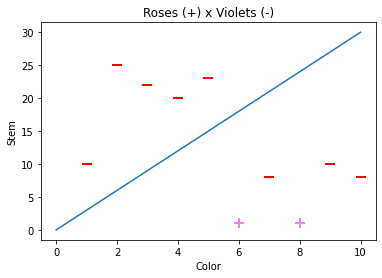

In [15]:
# Visualization - Plot the samples
for sample, d in zip(X_inputs,activated):
    # Plot the negative samples (Violets)
    if d > 0.5:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2, color = "red")
    # Plot the positive samples (Roses)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2, color = "violet")

# Print a possible hyperplane, that is seperating the two classes.
plt.xlabel('Color')
plt.ylabel('Stem')
plt.title('Roses (+) x Violets (-)')
plt.plot([0,10],[0,30])
plt.show()

## Summary

<p style='text-align: justify;'>
The Perceptron Neural Network imitates how a neuron in the brain works and consists of a single neuron. This notebook discusses the concept of a single-layer neural network in the Perceptron algorithm and its use in classification problems. The notebook also explains how inputs, weights, and activation function work in an artificial neural network. Finally, the notebook presents a complete representation of the structure of a Perceptron Neural Network.
</p>

## Clear the Memory

Before moving on, please execute the following cell to clear up the CPU memory. This is required to move on to the next notebook.

In [16]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

## Next

In this section you learned how to build a simple Perceptron Neural Network with Python for data classification. In the next section, you will be asked to build your own Perceptron with perform data preparation to solve a different data classification with the concepts of BIAS in the notebook [_02-percepetron-bias.ipynb_](02-percepetron-bias.ipynb).